In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("A:\\Aniket_Scidentai\\MLOPS\\predict_calorie_expenditure\\data\\raw\\Predict_Calorie_Expenditure.csv")

In [4]:
df.drop(columns={"id"}, inplace=True)

In [5]:
df.shape

(750000, 8)

In [6]:
df['Body_Temp'] = np.log(0.68 * (df['Body_Temp'].max() + 1 - 0.68*(df['Body_Temp'])))
df['Age'] = np.log(df['Age'] * 0.25 + 1)

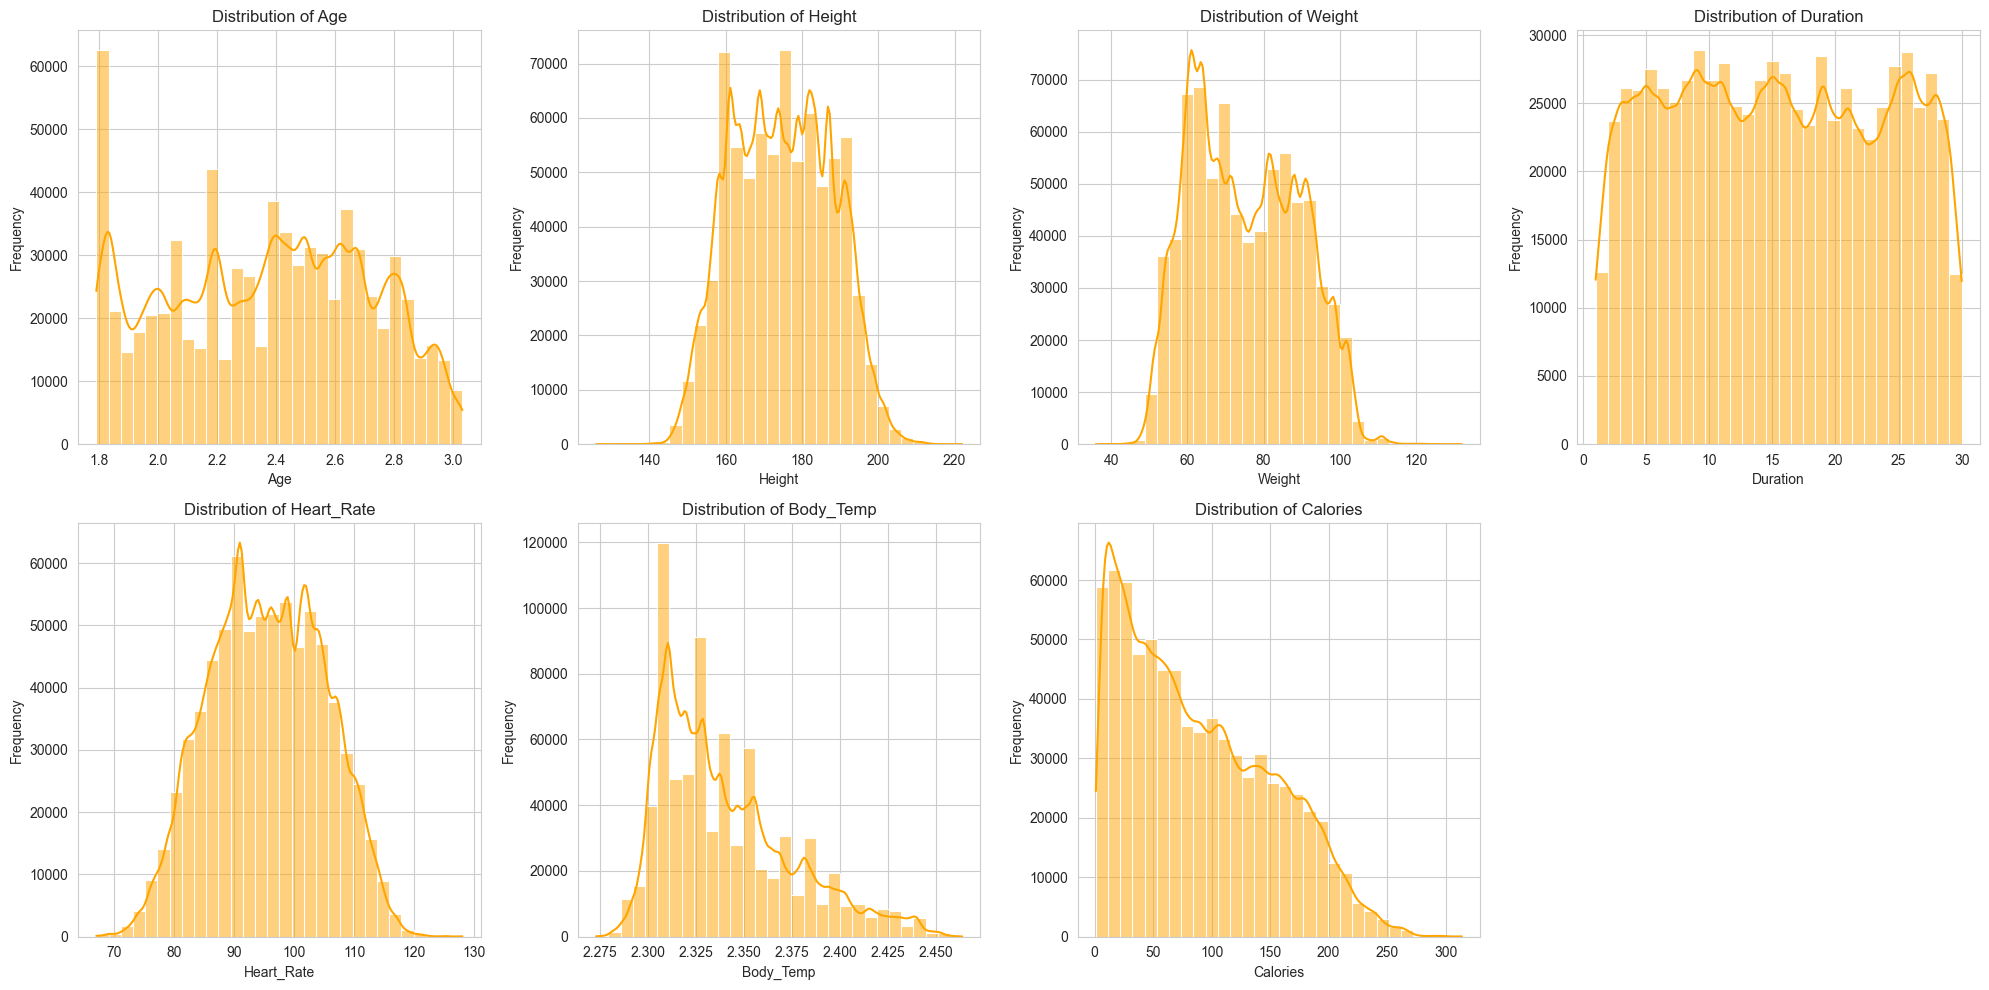

In [7]:
# Plot settings
sns.set_style(style="whitegrid")

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
cols_per_row = 4
rows = (len(numeric_cols) + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot histograms
for idx, col in enumerate(numeric_cols):
    sns.histplot(x=df[col], kde=True, bins=30, color='orange', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Hide unused subplots
for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

In [8]:
df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,2.302585,189.0,82.0,26.0,101.0,2.296728,150.0
1,female,2.833213,163.0,60.0,8.0,85.0,2.355436,34.0
2,female,2.621039,161.0,64.0,7.0,84.0,2.351040,29.0
3,male,1.791759,192.0,90.0,25.0,105.0,2.310585,140.0
4,female,2.351375,166.0,61.0,25.0,102.0,2.315162,146.0


In [17]:
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})

## Train Model 

In [18]:
X = df.drop(columns={"Calories"})
Y = df["Calories"]

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(525000, 7)
(225000, 7)
(525000,)
(225000,)


In [22]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import pandas as pd

# Initialize XGBRegressor with a comprehensive set of hyperparameters
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    colsample_bylevel=0.8,
    colsample_bynode=0.8,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    objective='reg:squarederror',
    booster='gbtree',
    tree_method='auto',
    n_jobs=-1,
    random_state=42,
    verbosity=1,
    base_score=0.5,
    max_delta_step=0,
    grow_policy='depthwise',
    importance_type='gain',
    monotone_constraints=None,
    interaction_constraints=None,
    enable_categorical=False,
    validate_parameters=True
)

# Fit the model
model.fit(
    X_train,
    Y_train,
    eval_set=[(X_test, Y_test)],
    verbose=False,
)

# Predict on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
rmse = root_mean_squared_error(Y_test, Y_pred)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 4.446342951689101
